# <span style="background:yellow">Correlation between trained task and all other tasks (Proportional result) (outliers removed)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [15]:
df=pd.read_excel('../pre-post_experiment/results/PreprocessedResults_NoOutliers.xlsx')
df=df.iloc[:,[0,11,12,13,14,15,16,17,18,19]]
df.rename(lambda x:x.replace('.1',''),axis='columns',inplace=True)
def specify_group(x):
    parts=x.split('_')[1]
    if parts == 'audtrain1':
        return 'aud'
    elif parts == 'audtrain2':
        return 'aud'
    elif parts == 'vistrain1':
        return 'vis'
    elif parts == 'vistrain2':
        return 'vis'
    elif parts == 'notrain':
        return 'notrain'
def specify_time(x):
    if x.split('_')[2] == 'post':
        return 'Post'
    else:
        return 'Pre'
df['group']=df['Name'].apply(specify_group)
df['Time']=df['Name'].apply(specify_time)
df

,Name,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,group,Time
0,train10_audtrain2_2023-11-09,0.86,0.54,0.83,0.71,0.79,0.63,0.76,0.71,0.63,aud,Pre
1,train10_audtrain2_post_2023-11-23,0.86,0.46,0.96,0.62,0.67,0.50,0.67,0.63,0.88,aud,Post
2,train11_vistrain2_2023-11-09,0.57,0.33,0.50,0.43,0.46,0.29,0.71,0.21,0.42,vis,Pre
3,train11_vistrain2_post_2023-11-23,0.76,0.58,0.50,0.29,0.42,0.42,0.62,0.46,0.21,vis,Post
4,train14_notrain_2023-11-10,0.81,0.29,0.46,0.57,0.50,0.33,0.76,0.38,0.29,notrain,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...
123,train81_audtrain1_post_2024-03-30,1.00,0.88,0.96,0.81,0.75,0.75,0.90,0.67,0.88,aud,Post
124,train8_notrain_2023-11-07,0.62,0.83,0.67,0.76,0.38,0.38,0.76,0.58,0.33,notrain,Pre
125,train8_notrain_post_2023-11-21,0.71,0.54,0.63,0.76,0.67,0.46,0.76,0.46,0.63,notrain,Post
126,train9_notrain_2023-11-08,0.90,0.50,0.54,0.71,0.50,0.54,0.71,0.63,0.50,notrain,Pre


In [17]:
df_aud = df[df['group']=='aud'].reset_index(drop=True)
df_aud

,Name,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,group,Time
0,train10_audtrain2_2023-11-09,0.86,0.54,0.83,0.71,0.79,0.63,0.76,0.71,0.63,aud,Pre
1,train10_audtrain2_post_2023-11-23,0.86,0.46,0.96,0.62,0.67,0.50,0.67,0.63,0.88,aud,Post
2,train20_audtrain2_2023-11-13,0.57,0.25,0.63,0.48,0.54,0.21,0.71,0.42,0.38,aud,Pre
3,train20_audtrain2_post_2023-11-27,0.71,0.46,0.54,0.81,0.54,0.38,0.71,0.54,0.54,aud,Post
4,train23_audtrain1_2023-11-15,0.86,0.96,0.88,0.76,0.83,0.50,0.71,1.00,0.75,aud,Pre
5,train23_audtrain1_post_2023-11-27,0.90,1.00,0.96,0.86,0.79,0.67,0.81,0.92,0.92,aud,Post
6,train34_audtrain1_2023-11-18,0.76,0.75,0.88,0.76,0.50,0.58,0.67,0.42,0.21,aud,Pre
7,train34_audtrain1_post_2023-12-03,0.81,0.46,1.00,0.62,0.71,0.71,0.71,0.63,0.54,aud,Post
8,train37_audtrain2_2023-11-18,0.81,0.58,0.67,0.71,0.33,0.50,0.76,0.29,0.38,aud,Pre
9,train37_audtrain2_post_2023-12-01,0.76,0.63,0.79,0.81,0.21,0.38,0.76,0.54,0.58,aud,Post


In [18]:
diff_data = {}
for col in df_aud.columns[1:10]:
    differences = []
    for i in range(0, 40, 2):
        pre_value = df_aud.iloc[i][col]
        post_value = df_aud.iloc[i+1][col]
        if pre_value == 1:
            diff = (post_value - pre_value).round(2)
        else:
            diff = ((post_value - pre_value) / (1 - pre_value)).round(2)
        differences.append(diff)
    diff_data[f'{col}_diff'] = differences

diff_df = pd.DataFrame(diff_data)
diff_df

,AudSD_diff,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
0,0.00,-0.17,0.76,-0.31,-0.57,-0.35,-0.37,-0.28,0.68
1,0.33,0.28,-0.24,0.63,0.00,0.22,0.00,0.21,0.26
2,0.29,1.00,0.67,0.42,-0.24,0.34,0.34,-0.08,0.68
3,0.21,-1.16,1.00,-0.58,0.42,0.31,0.12,0.36,0.42
4,-0.26,0.12,0.36,0.34,-0.18,-0.24,0.00,0.35,0.32
5,0.21,0.21,0.22,0.42,-0.19,0.06,0.21,0.14,0.28
6,0.21,-1.14,0.00,0.17,-2.08,-0.24,-1.00,0.17,-0.26
7,0.00,-0.34,0.36,0.00,0.15,-0.24,0.50,0.13,0.27
8,-0.87,0.07,-0.24,-0.10,0.08,0.35,-0.21,-0.27,0.15
9,0.00,0.18,0.26,0.13,0.24,0.41,0.34,-0.60,-0.07


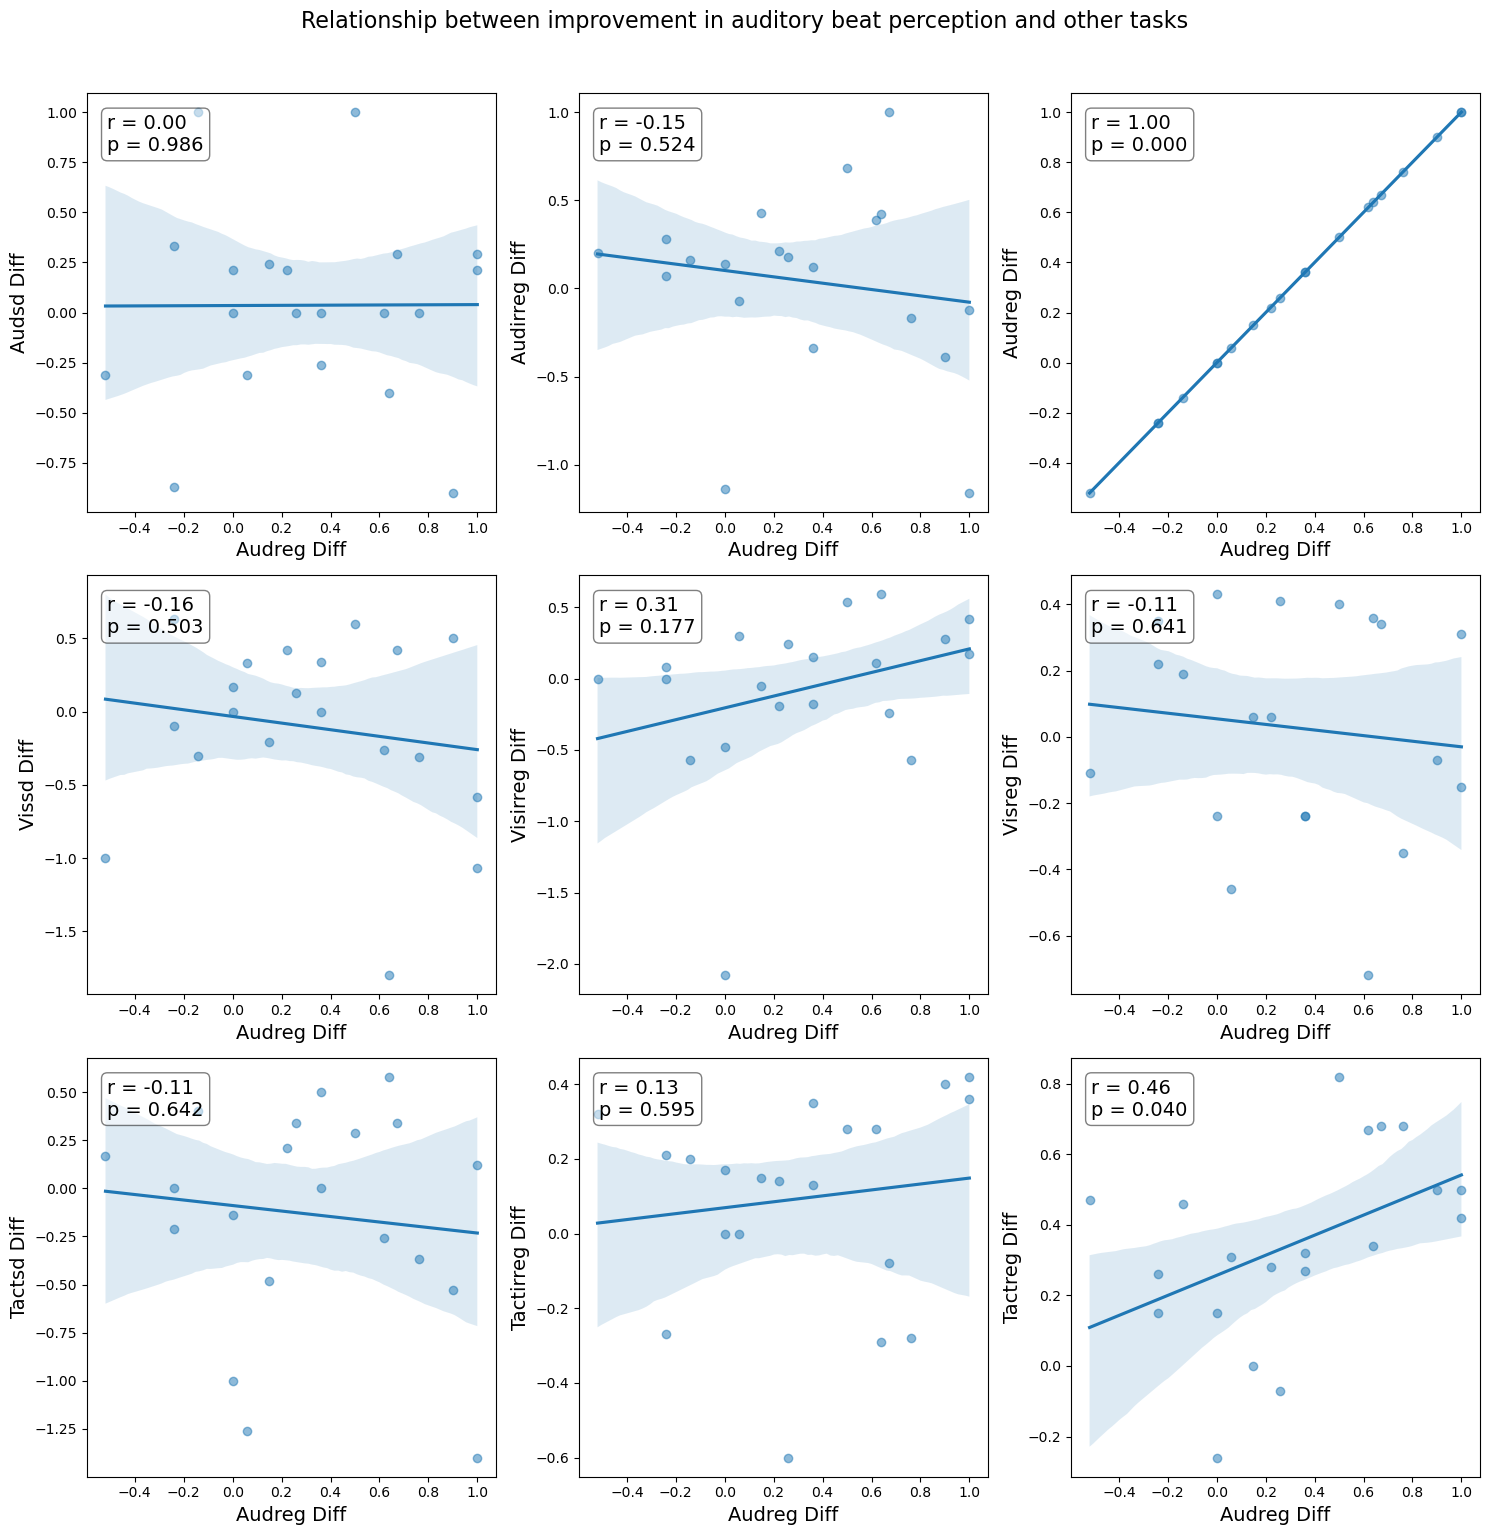

In [20]:
# Assuming diff_df is your DataFrame with all the differences calculated
reference_col = list(diff_df.columns)[2]

# Set up the matplotlib figure and axes
num_cols = len(diff_df.columns) - 1
fig, axes = plt.subplots(nrows=num_cols//3 + 1, ncols=3, figsize=(15, 5 * (num_cols//3 + 1)))
axes = axes.flatten()  # Flatten the array of axes if they are in matrix form

for i, col in enumerate(diff_df.columns):  # Skipping the first column which is used as X
    ax = axes[i]
    sns.regplot(data=diff_df, x=reference_col, y=col, ax=ax, scatter_kws={'alpha':0.5})

    # Calculate the Pearson correlation coefficient and p-value
    corr, p_value = pearsonr(diff_df[reference_col], diff_df[col])
    
    formatted_p_value = f'{p_value:.3f}'

    # Annotate the plot with the correlation coefficient and p-value
    ax.annotate(f'r = {corr:.2f}\np = {formatted_p_value}', xy=(0.05, 0.95), xycoords='axes fraction', 
                ha='left', va='top', fontsize=14, bbox=dict(boxstyle="round,pad=0.3", alpha=0.5, facecolor='white'))

    ax.set_xlabel(reference_col.replace('_', ' ').title(), fontsize=14)  # Format and set font size for x-label
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=14)  # Format and set font size for y-label

fig.suptitle('Relationship between improvement in auditory beat perception and other tasks', fontsize=16, y=1.02)

# Adjust layout and plot
plt.tight_layout()
plt.savefig('../plots/Correlation_audtrain.png', bbox_inches='tight',dpi=250)
plt.show()


In [22]:
df_vis = df[df['group']=='vis'].reset_index(drop=True)
df_vis

,Name,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,group,Time
0,train11_vistrain2_2023-11-09,0.57,0.33,0.50,0.43,0.46,0.29,0.71,0.21,0.42,vis,Pre
1,train11_vistrain2_post_2023-11-23,0.76,0.58,0.50,0.29,0.42,0.42,0.62,0.46,0.21,vis,Post
2,train16_vistrain2_2023-11-12,0.86,0.54,0.63,0.81,0.71,0.42,0.86,0.42,0.63,vis,Pre
3,train16_vistrain2_post_2023-11-24,0.76,0.58,0.50,0.86,0.54,0.42,0.81,0.50,0.58,vis,Post
4,train19_vistrain1_2023-11-13,0.90,0.46,0.58,0.57,0.67,0.33,0.76,0.42,0.58,vis,Pre
5,train19_vistrain1_post_2023-11-26,0.71,0.58,0.58,0.81,0.75,0.75,0.57,0.46,0.58,vis,Post
6,train21_vistrain2_2023-11-14,0.57,0.67,0.58,0.81,0.29,0.33,0.71,0.50,0.38,vis,Pre
7,train21_vistrain2_post_2023-11-30,0.71,0.75,0.38,0.62,0.46,0.33,0.71,0.38,0.21,vis,Post
8,train22_vistrain1_2023-11-15,0.86,0.92,0.75,0.71,0.71,0.54,0.62,0.75,0.58,vis,Pre
9,train22_vistrain1_post_2023-11-29,0.62,0.75,0.75,0.81,0.63,0.63,0.52,0.63,0.79,vis,Post


In [23]:
diff_data = {}
for col in df_vis.columns[1:10]:
    differences = []
    for i in range(0, 48, 2):
        pre_value = df_vis.iloc[i][col]
        post_value = df_vis.iloc[i+1][col]
        if pre_value == 1:
            diff = (post_value - pre_value).round(2)
        else:
            diff = ((post_value - pre_value) / (1 - pre_value)).round(2)
        differences.append(diff)
    diff_data[f'{col}_diff'] = differences

diff_df = pd.DataFrame(diff_data)
diff_df

,AudSD_diff,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
0,0.44,0.37,0.00,-0.25,-0.07,0.18,-0.31,0.32,-0.36
1,-0.71,0.09,-0.35,0.26,-0.59,0.00,-0.36,0.14,-0.14
2,-1.90,0.22,0.00,0.56,0.24,0.63,-0.79,0.07,0.00
3,0.33,0.24,-0.48,-1.00,0.24,0.00,0.00,-0.24,-0.27
4,-1.71,-2.13,0.00,0.34,-0.28,0.20,-0.26,-0.48,0.50
5,0.29,0.41,-0.84,0.13,0.52,0.00,0.00,-0.57,1.00
6,0.63,0.37,-0.48,-0.66,-0.81,0.06,0.21,-0.50,0.14
7,0.00,0.54,-0.28,-0.58,-0.38,-0.10,0.37,-0.09,0.09
8,0.42,0.84,0.36,0.00,0.67,0.43,0.17,0.79,0.08
9,-0.36,0.76,0.68,-0.71,0.50,0.83,-1.90,0.19,0.48


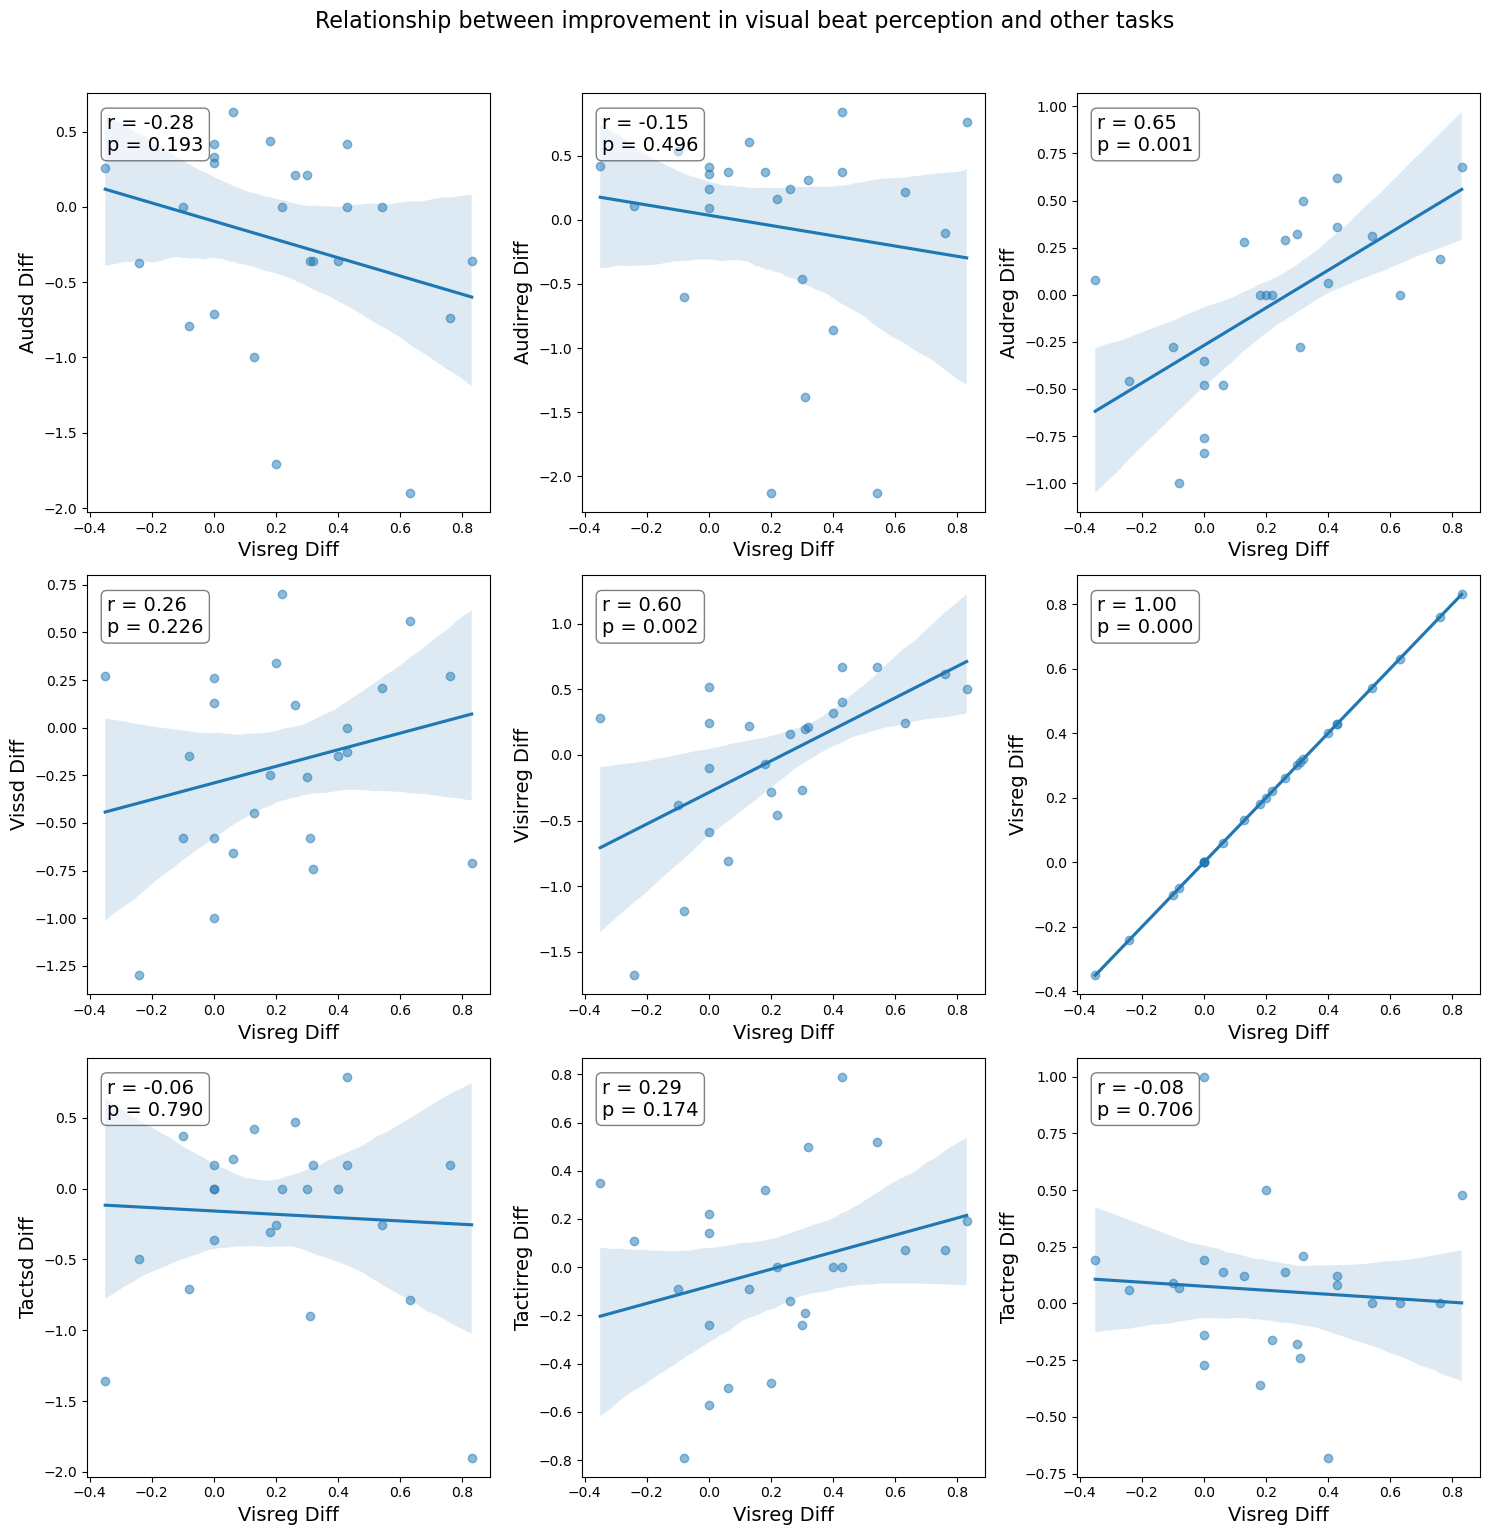

In [24]:
# Assuming diff_df is your DataFrame with all the differences calculated
reference_col = list(diff_df.columns)[5]

# Set up the matplotlib figure and axes
num_cols = len(diff_df.columns) - 1
fig, axes = plt.subplots(nrows=num_cols//3 + 1, ncols=3, figsize=(15, 5 * (num_cols//3 + 1)))
axes = axes.flatten()  # Flatten the array of axes if they are in matrix form

for i, col in enumerate(diff_df.columns):  # Skipping the first column which is used as X
    ax = axes[i]
    sns.regplot(data=diff_df, x=reference_col, y=col, ax=ax, scatter_kws={'alpha':0.5})

    # Calculate the Pearson correlation coefficient and p-value
    corr, p_value = pearsonr(diff_df[reference_col], diff_df[col])

    # Format p-value to 2 decimal points
    formatted_p_value = f'{p_value:.3f}'

    # Annotate the plot with the correlation coefficient and p-value
    ax.annotate(f'r = {corr:.2f}\np = {formatted_p_value}', xy=(0.05, 0.95), xycoords='axes fraction', 
                ha='left', va='top', fontsize=14, bbox=dict(boxstyle="round,pad=0.3", alpha=0.5, facecolor='white'))

    ax.set_xlabel(reference_col.replace('_', ' ').title(), fontsize=14)  # Format and set font size for x-label
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=14)  # Format and set font size for y-label

fig.suptitle('Relationship between improvement in visual beat perception and other tasks', fontsize=16, y=1.02)

# Adjust layout and plot
plt.tight_layout()
plt.savefig('../plots/Correlation_vistrain.png', bbox_inches='tight',dpi=250)
plt.show()
